<h1>GDP Analysis of the Indian States</h1>

In [105]:
#Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import rankdata
import glob
import copy
import squarify # pip install squarify (algorithm for treemap)&lt;/pre&gt;
import matplotlib
# set a seaborn style of your taste
sns.set_style("whitegrid")

<h2 style="font-family:'Merriweather',serif">Part I-A</h2>

For the analysis below, use the Data I-A.
<ol>

<li>Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.</li>

<li>Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'. Compare the calculated values and plot them for the states. Make appropriate transformations, if necessary, to plot the data. Report the average growth rates of the various states:
    <ul>
        <li>Which states have been growing consistently fast, and which ones have been struggling?</li>
        <li>Curiosity exercise: What has been the average growth rate of your home state, and how does it compare to the national average over this duration?</li>
</ul>
<li>Plot the total GDP of the states for the year 2015-16:</li>
    <ul>
        <li>Identify the top 5 and the bottom 5 states based on total GDP.</li>
    </ul>
</ol>

In [2]:
def values_over_bar(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [3]:
def values_over_stacked_bar(plot,df):
    for rowNum,row in df.iterrows():
        xpos = 0
        for val in row:
            xpos += val
            plot.text(xpos + 1, rowNum-0.05, str(val), color='black')
        xpos = 0
    display(plot)

In [4]:
def firstrow_to_header(df):
    new_header = df.iloc[0] #grab the first row for the header
    df = df[1:] #take the data less the header row
    df.columns = new_header #set the header row as the df header
    return df

In [5]:
class text_style:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [6]:
part1A=pd.read_csv("./GDP-Assignment/GDP-Statewise.csv");

In [7]:
# Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.
cleanedPart1A=part1A.drop(part1A.loc[part1A['Duration']=='2016-17'].index)

In [8]:
# Removing column 'West Bengal1' as whole coumn don't have data , all values are NA
cleanedStates=cleanedPart1A.drop(['West Bengal1'], axis=1)

In [9]:
font = {'size'   : 10}

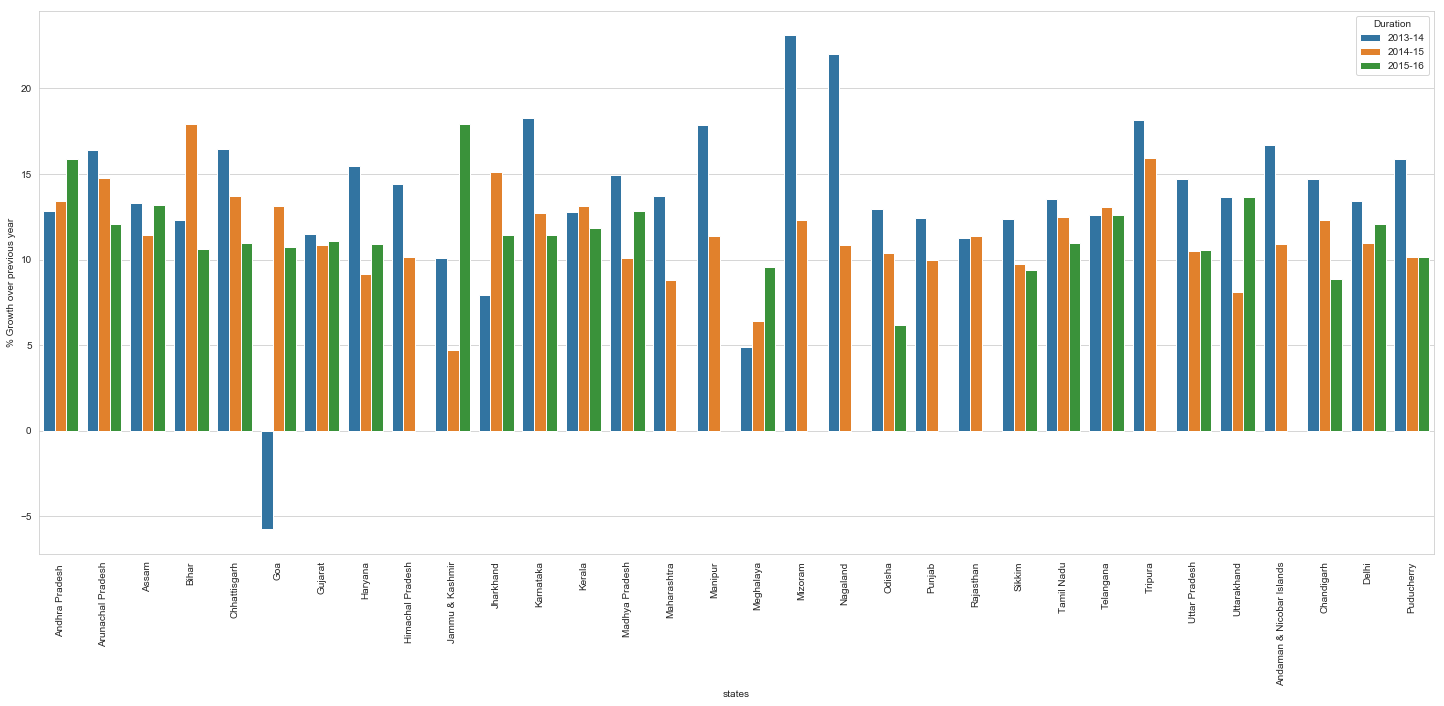

In [10]:
cent_growth=cleanedStates.loc[(cleanedStates['Duration'].isin(['2013-14','2014-15','2015-16'])) & 
                                    (cleanedStates['Items  Description']=="(% Growth over previous year)"),
                                    cleanedStates.columns !='All_India GDP']
cent_growth=cent_growth.transpose()
cent_growth=cent_growth.drop(['Items  Description'],axis=0)

cent_growth=firstrow_to_header(cent_growth)

cent_growth["states"] = cent_growth.index
cent_growth=pd.melt(cent_growth, id_vars=['states'])
plt.figure(figsize=(25, 10))
sns.barplot(x='states', y='value', hue='Duration', data=cent_growth,)
plt.xticks(rotation=90)
plt.ylabel('% Growth over previous year')
plt.rc('font', **font)
# cent_growth
plt.show()

<b>From just over look on  % Growth over previous year for each state over period  Andhra Pradesh and Meghalaya only showing growing trend.</b>

Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'. Compare the calculated values and plot them for the states. 

In [11]:
mean_of_growth_for_cleaned_states=round(cleanedStates.loc[(cleanedStates['Duration'].isin(['2013-14','2014-15','2015-16'])) & 
                                    (cleanedStates['Items  Description']=="(% Growth over previous year)"),
                                    cleanedStates.columns !='All_India GDP'].mean(),1).sort_values()

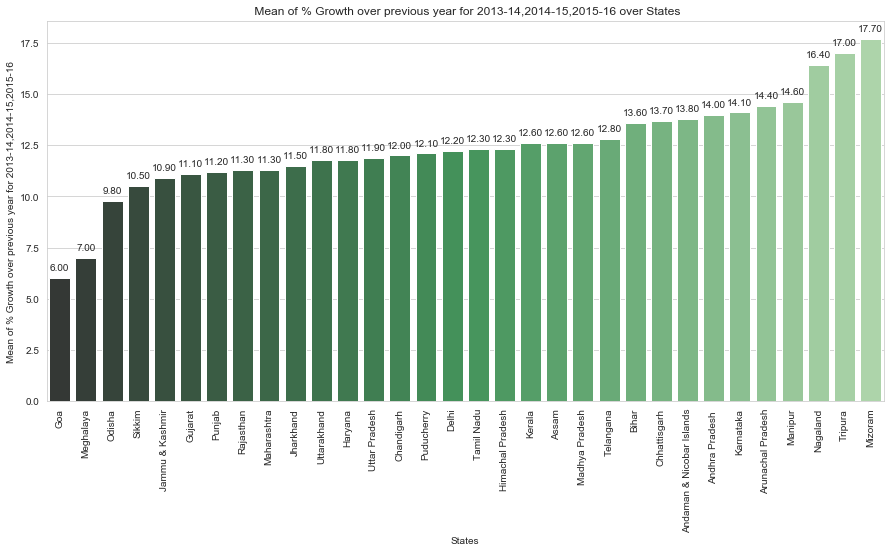

In [162]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation=90)
pal = sns.color_palette("Greens_d", len(mean_of_growth_for_cleaned_states))
plot_mean_of_growth_for_cleaned_states=sns.barplot(mean_of_growth_for_cleaned_states.index,
                                                   mean_of_growth_for_cleaned_states.values,
                                                   palette=pal)
values_over_bar(plot_mean_of_growth_for_cleaned_states)
plt.title(" Mean of % Growth over previous year for 2013-14,2014-15,2015-16 over States")
plt.xlabel("States")
plt.ylabel("Mean of % Growth over previous year for 2013-14,2014-15,2015-16")
plt.show()

<h3>As per mean of % Growth over previous year for 2013-14,2014-15,2015-16</h3>
<h4>Which states have been growing consistently fast, and which ones have been struggling?</h4>
<h4>Growing consistently fast</h4>
<ol>
    <li>Mizoram</li>
    <li>Tripura</li>
    <li>Nagaland</li>
</ol>
<h4>Ones have been struggling</h4>
<ol>
    <li>Goa</li>
    <li>Meghalaya</li>
    <li>Odisha</li>
</ol>

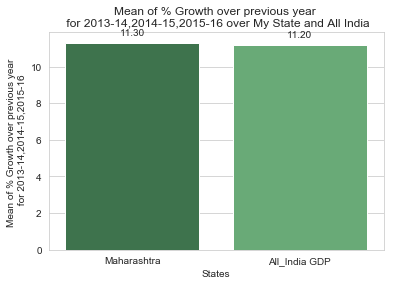

In [167]:
mystate_and_nation_data=cleanedStates.loc[(cleanedStates['Duration'].isin(['2013-14','2014-15','2015-16'])) & 
                                    (cleanedStates['Items  Description']=="(% Growth over previous year)"),["Maharashtra","All_India GDP"]]
mystate_and_nation_mean=round(mystate_and_nation_data.mean(),1)    
# plt.xticks(rotation=90)
pal = sns.color_palette("Greens_d", len(mystate_and_nation_mean))
mystate_and_nation_mean_plot=sns.barplot(mystate_and_nation_mean.index,mystate_and_nation_mean.values,palette=pal)
values_over_bar(mystate_and_nation_mean_plot)
plt.title("Mean of % Growth over previous year \n for 2013-14,2014-15,2015-16 over My State and All India")
plt.xlabel("States")
plt.ylabel("Mean of % Growth over previous year \n for 2013-14,2014-15,2015-16")
plt.show()

<b>My state Maharashtra is showing slight better average % Growth over previous year over three years than All_India. Difference is not much significant</b>

In [14]:
# print(part1A["Items  Description"])
GDP2015_16=np.log(part1A.loc[
    (part1A["Duration"]=="2015-16") & (part1A["Items  Description"]=="GSDP - CURRENT PRICES (` in Crore)"),
    (part1A.columns !="Duration")&(part1A.columns != "Items  Description")&(part1A.columns !='All_India GDP')].transpose())
GDP2015_16 = GDP2015_16.rename(columns={4: 'GDP2015_16'})
GDP2015_16 = GDP2015_16[np.isfinite(GDP2015_16['GDP2015_16'])]

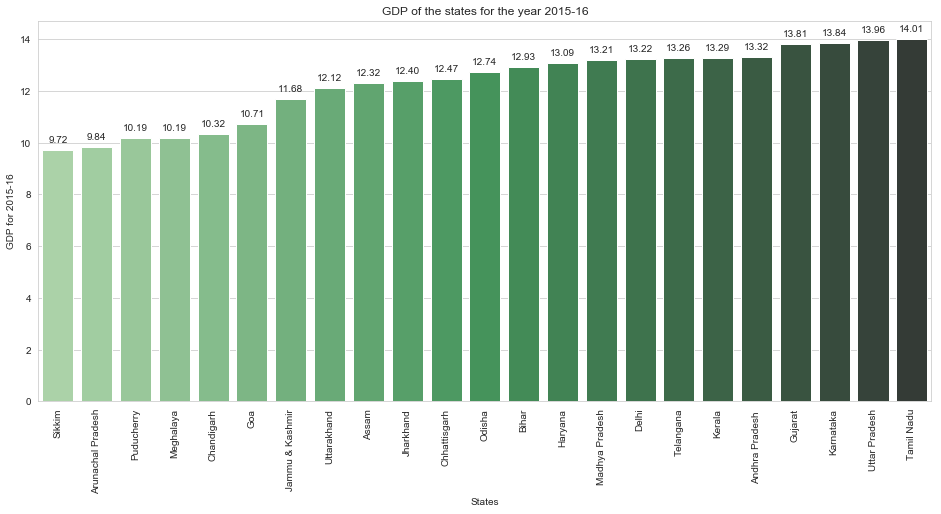

In [168]:
plt.figure(figsize=(16, 7))
plt.xticks(rotation=90)
pal = sns.color_palette("Greens_d", len(GDP2015_16))
GDP2015_16.sort_values(by=['GDP2015_16'],inplace=True)
rank = (rankdata(GDP2015_16['GDP2015_16'])-1).astype('int')
# rank=GDP2015_16['GDP2015_16'].argsort().argsort()

plot_GDP2015_16=sns.barplot(x=GDP2015_16.index.get_level_values(0),y=GDP2015_16['GDP2015_16'],palette=np.array(pal[::-1])[rank])
values_over_bar(plot_GDP2015_16)
plt.title("GDP of the states for the year 2015-16")
plt.xlabel("States")
plt.ylabel("GDP for 2015-16")
plt.show()

We have discarded the states whose data is not present, so from given data we plotted above graph. 
From Above graph its evident that
<h4>Top 5 states in terms of GDP</h4>
<ol>
    <li>Tamil Nadu</li>
    <li>Uttar Pradesh</li>
    <li>Karnataka</li>
    <li>Gujrat</li>
    <li>Andhra Pradesh</li>
</ol>
<h4>Bottom 5 states in terms of GDP</h4>
<ol>
    <li>Sikkim</li>
    <li>Arunachal Pradesh</li>
    <li>Pudduchery(UT)</li>
    <li>Meghalaya</li>
    <li>Chandigarh</li>
</ol>

<h2 style="font-family:'Merriweather',serif">Part I-B</h2>

<ul><li style="margin-bottom: 0px;">For the analysis below, use <strong>Data I-B</strong>. You can also use <strong>Data I-B</strong>&nbsp;along with <strong>Data I-A</strong> if required. Also, perform the analysis only for the duration&nbsp;2014-15.&nbsp;</li><li>Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further analysis, as&nbsp;they are governed directly by the centre, not state governments.</li><li>Plot the GDP per capita for all the states.<ul><li>Identify the top 5&nbsp;and the bottom 5&nbsp;states based on the GDP per capita.</li><li>Find the ratio of the highest per capita GDP to the lowest per capita GDP.</li></ul></li><li>Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.</li><li>Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where&nbsp;C1 would have the highest per capita GDP and&nbsp;C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1;&nbsp;those between the 50th and the 85th percentiles are in C2, and so on.<ul><li style="margin-bottom: 0px;"><strong>Note:&nbsp;</strong>Categorisation into four groups will simplify the subsequent analysis, as otherwise, comparing the data of all the states would become quite exhaustive.</li></ul></li><li>For each category (C1, C2, C3, C4):<ul><li dir="ltr"><p dir="ltr" style="margin-bottom: 0px;">Find the top 3/4/5&nbsp;<strong>sub-sectors (</strong>such as agriculture, forestry and fishing, crops, manufacturing etc., not&nbsp;primary, secondary and tertiary)&nbsp;that contribute to approximately&nbsp;80% of the GSDP of&nbsp;each category.</p><ul><li><p dir="ltr" style="margin-bottom: 0px;"><strong>Note-I:&nbsp;</strong>The nomenclature for this project is as follows: primary, secondary and tertiary are&nbsp;named 'sectors', while agriculture, manufacturing etc. are named 'sub-sectors'.</p></li><li><p dir="ltr" style="margin-bottom: 0px;"><strong>Note-II</strong>: If the top 3 sub-sectors contribute to, say, 79% of the GDP of some category, you can report "These top 3 sub-sectors contribute to approximately&nbsp;80% of the GDP". This is&nbsp;to simplify the analysis and make the results consumable. (Remember, the CEO has to present the report to the CMs, and CMs have limited time;&nbsp;so, the analysis needs to be sharp and concise.)</p></li></ul></li><li dir="ltr"><p dir="ltr">Plot the contribution of the sub-sectors as a percentage of the GSDP of each category. &nbsp;</p></li></ul></li></ul>

In [17]:
path = '.\\GDP-Assignment' # use your path
all_files = glob.glob(path + "/NAD*.csv")

In [18]:
combined_data=pd.read_csv(all_files[0],encoding='cp1252')
combined_data=combined_data.loc[:,['Item','2014-15']]
combined_data=combined_data.rename(columns={'2014-15': str(all_files[0]).split('-')[2]})
#   observed incorrect trailing * in some of items
combined_data['Item']=combined_data['Item'].str.strip("*")

for filename in all_files[1:]:
    df = pd.read_csv(filename,encoding='cp1252')
    df=df.loc[:,['Item','2014-15']]
    df=df.rename(columns={'2014-15': str(filename).split('-')[2]})
#   observed incorrect trailing * in some of items
    df['Item']=df['Item'].str.strip("*")
    combined_data=pd.merge(combined_data,df,on='Item',how="outer")
    
# combined_data.to_csv('./combined.csv',index=False)
combined_data.iloc[:,1:]=combined_data.iloc[:,1:].abs()
combined_data.iloc[:,:]
combined_data.head()

,Item,Andaman_Nicobar,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,...,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttarakhand,Uttar_Pradesh
0,"Agriculture, forestry and fishing",76670.0,14819416.0,686117.0,3855548.0,7951890.0,16233.0,3948847.0,250568.0,308507.0,...,6422978.0,113156.0,9285716.0,15044394.0,137447.0,13064238.0,7591501.0,799825.0,1601423.0,25097754.0
1,Crops,34026.0,7893514.0,415520.0,2890544.0,4688237.0,1659.0,2613371.0,64959.0,140421.0,...,4382636.0,38878.0,5690972.0,7673441.0,114976.0,7297820.0,4162493.0,397591.0,866146.0,16215212.0
2,Livestock,19560.0,4309078.0,38387.0,173478.0,2060296.0,13992.0,352208.0,183770.0,30141.0,...,788243.0,45358.0,2638842.0,5356257.0,17338.0,4693361.0,2951299.0,88176.0,391188.0,7096876.0
3,Forestry and logging,4634.0,346160.0,224017.0,261987.0,550132.0,388.0,597785.0,861.0,15744.0,...,791463.0,3931.0,848245.0,1956660.0,4529.0,392705.0,210741.0,145096.0,339293.0,1404936.0
4,Fishing and aquaculture,18451.0,2270664.0,8193.0,529539.0,653224.0,194.0,385483.0,978.0,122201.0,...,460636.0,24989.0,107657.0,58036.0,604.0,680352.0,266968.0,168961.0,4796.0,380730.0


In [19]:
UT=['Chandigarh',
'Dadra and Nagar Haveli',
'Daman and Diu',
'Lakshadweep',
'Puducherry',
'Andaman_Nicobar',
'Delhi']
required_states_columns=combined_data.columns[~combined_data.columns.isin(UT)]
combined_states_data=combined_data[required_states_columns]

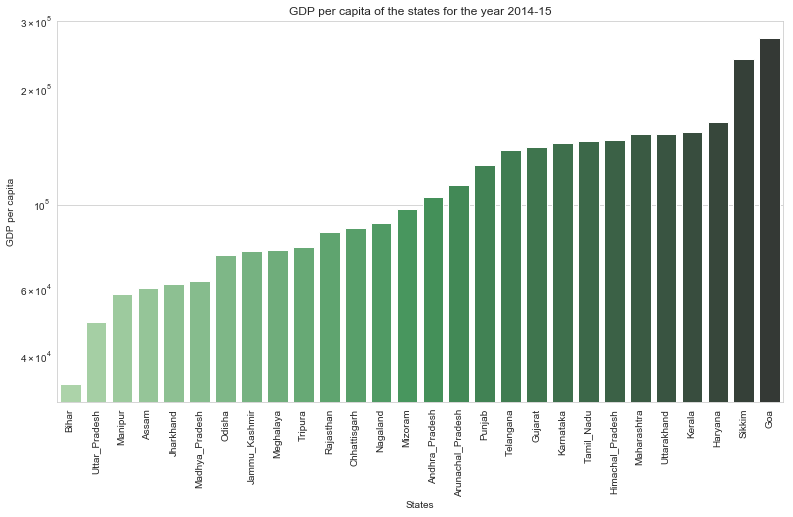

In [176]:
GDP_per_capita_data=combined_states_data.loc[combined_states_data['Item']=='Per Capita GSDP (Rs.)',:].transpose()
GDP_per_capita_data=firstrow_to_header(GDP_per_capita_data).sort_values(['Per Capita GSDP (Rs.)'])
# GDP_per_capita_data['Per Capita GSDP (Rs.)']=np.log(GDP_per_capita_data['Per Capita GSDP (Rs.)'])
GDP_per_capita_data.columns.name="States"
plt.figure(figsize=(13, 7))
plt.xticks(rotation=90)
pal = sns.color_palette("Greens_d", len(GDP_per_capita_data))
g=sns.barplot(x=GDP_per_capita_data.index,y=GDP_per_capita_data['Per Capita GSDP (Rs.)'],palette=np.array(pal[::-1]))
plt.title("GDP per capita of the states for the year 2014-15")
plt.xlabel("States")
plt.ylabel("GDP per capita")
g.set_yscale('log')
plt.show()

<h4>Top 5 states based on the GDP per capita</h4>
<ol>
    <li>Goa</li>
    <li>Sikkim</li>
    <li>Haryana</li>
    <li>Kerla</li>
    <li>Uttarakhand</li>
</ol>
<h4>Bottom 5 states based on the GDP per capita</h4>
<ol>
    <li>Bihar</li>
    <li>Uttar Pradesh</li>
    <li>Manipur</li>
    <li>Assam</li>
    <li>Madhya Pradesh</li>
</ol>

In [21]:
maxGDP=max(GDP_per_capita_data['Per Capita GSDP (Rs.)'])
maxGDPState=GDP_per_capita_data[GDP_per_capita_data['Per Capita GSDP (Rs.)']==max(GDP_per_capita_data['Per Capita GSDP (Rs.)'])].index[0]
minGDP=min(GDP_per_capita_data['Per Capita GSDP (Rs.)'])
minGDPState=GDP_per_capita_data[GDP_per_capita_data['Per Capita GSDP (Rs.)']==min(GDP_per_capita_data['Per Capita GSDP (Rs.)'])].index[0]
ratio=maxGDP/minGDP
print(text_style.BOLD+text_style.BLUE+"From given data max to min GDP ratio is",ratio,", where state with max GDP is",maxGDPState,"and state with min GDP is", minGDPState)

From given data max to min GDP ratio is 8.004741709371503 , where state with max GDP is Goa and state with min GDP is Bihar


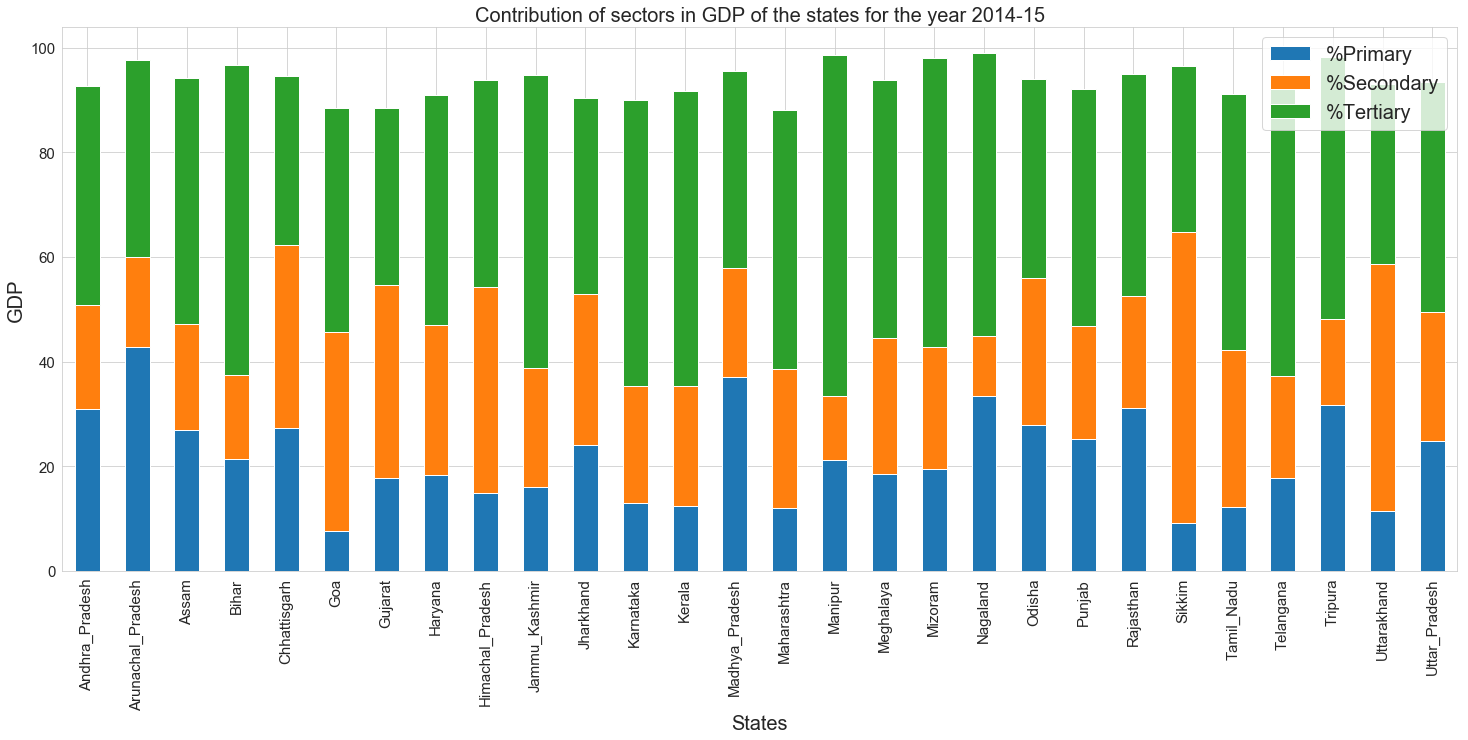

In [185]:
pd.options.mode.chained_assignment = None

t_combined_states_data=combined_states_data.transpose()
t_combined_states_data=firstrow_to_header(t_combined_states_data)
t_combined_states_data.columns.name="State"
t_sectors_combined_states_data=t_combined_states_data[['Primary','Secondary','Tertiary','Gross State Domestic Product']]

t_sectors_combined_states_data['%Primary']=(t_sectors_combined_states_data['Primary']/t_sectors_combined_states_data['Gross State Domestic Product'])*100

t_sectors_combined_states_data['%Secondary']=(t_sectors_combined_states_data['Secondary']/t_sectors_combined_states_data['Gross State Domestic Product'])*100

t_sectors_combined_states_data['%Tertiary']=(t_sectors_combined_states_data['Tertiary']/t_sectors_combined_states_data['Gross State Domestic Product'])*100
t_cent_sectors_combined_states_data=t_sectors_combined_states_data[['%Primary','%Secondary','%Tertiary']]

t_cent_sectors_combined_states_data
stacked_plot=t_cent_sectors_combined_states_data.transpose().T.plot(kind='bar', stacked=True,figsize=(25, 10),fontsize=15)
# values_over_bar(stacked_plot)
plt.legend(fontsize=20)
plt.title("Contribution of sectors in GDP of the states for the year 2014-15",fontsize=20)
plt.xlabel("States",fontsize=20)
plt.ylabel("GDP",fontsize=20)
plt.show()
# t_cent_sectors_combined_states_data

<h3>Sectorwise Analysis</h3>
<b style="color:red">Remove unrequired columns</b>

In [23]:
not_required=['Primary','Secondary','Tertiary','TOTAL GSVA at basic prices',
'Taxes on Products',
'Subsidies on products',
"Population ('00)",
"Crops",
"Livestock",
"Forestry and logging",
"Fishing and aquaculture",
"Trade & repair services",
"Hotels & restaurants",
"Railways",
"Road transport",
"Water transport",
"Air transport",
"Services incidental to transport",
"Storage",
"Communication & services related to broadcasting"
]

required_columns=t_combined_states_data.columns[~t_combined_states_data.columns.isin(not_required)]
t_combined_subsectors_data=t_combined_states_data[required_columns]
len(t_combined_subsectors_data.columns)

13

In [24]:
per_capita_GDP=t_combined_subsectors_data['Per Capita GSDP (Rs.)']
q_85=per_capita_GDP.quantile(0.85)
q_50=per_capita_GDP.quantile(0.50)
q_20=per_capita_GDP.quantile(0.20)

t_c1=t_combined_subsectors_data[t_combined_subsectors_data['Per Capita GSDP (Rs.)']>=q_85].transpose()
t_c2=t_combined_subsectors_data[(t_combined_subsectors_data['Per Capita GSDP (Rs.)']<q_85) & (t_combined_subsectors_data['Per Capita GSDP (Rs.)']>=q_50)].transpose()
t_c3=t_combined_subsectors_data[(t_combined_subsectors_data['Per Capita GSDP (Rs.)']<q_50) & (t_combined_subsectors_data['Per Capita GSDP (Rs.)']>=q_20)].transpose()
t_c4=t_combined_subsectors_data[t_combined_subsectors_data['Per Capita GSDP (Rs.)']<q_20].transpose()

In [190]:
def plot_categories(cat,categoty_name):
    category=copy.deepcopy(cat);
    print (text_style.BOLD +text_style.GREEN + 'Plot for category' +categoty_name+" having states "+" , ".join(category.columns.tolist()))
    
    category['Total']=category.sum(axis = 1, skipna = True) 
    total_GDP=category.at['Gross State Domestic Product','Total']
    category['%ofTotalGDP']=round((category['Total']/total_GDP)*100,1)
    category=category.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'],axis=0)
    category=category.sort_values(by='%ofTotalGDP',ascending=False)
    plt.figure(figsize=(10,5))
    c1_plot=sns.barplot(x=category['%ofTotalGDP'],y=category.index,color='lightblue')
    plt.ylabel('Sub-Sectors')
    plt.show()
    stacked_cat_plot=pd.DataFrame(category['%ofTotalGDP']).T.plot(kind='barh',stacked=True,figsize=(15, 5),fontsize=10)
    plt.xticks(rotation=90)
    plt.legend(loc=1)
    plt.xlabel('Sub-Sectors')
    plt.show()

Plot for category C1 having states Goa , Haryana , Kerala , Sikkim , Uttarakhand


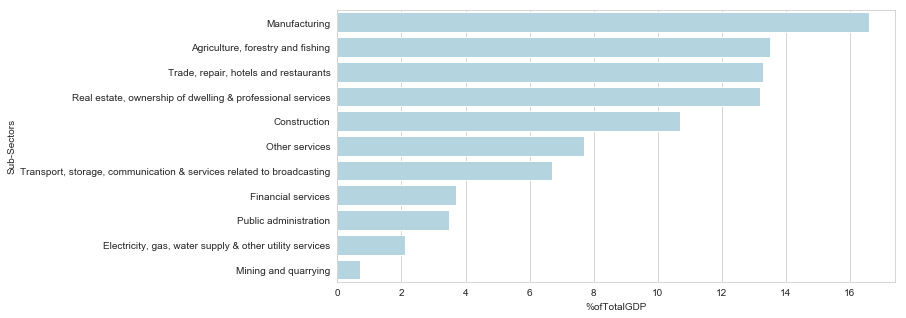

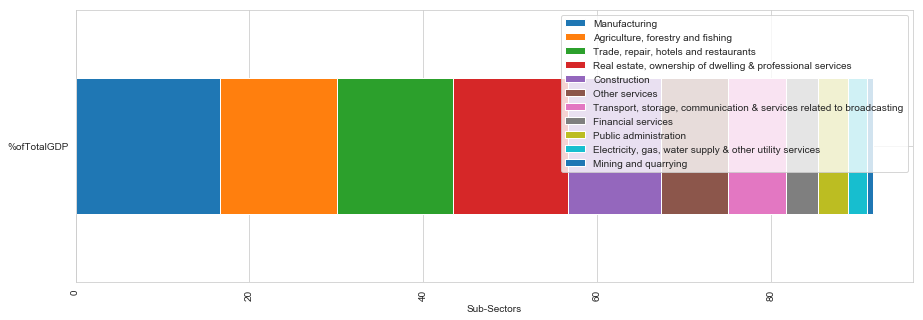

In [191]:
plot_categories(t_c1," C1")

<h4>Subcategories contributing 80% of GDP <font color='red'>for C1 having states Goa , Haryana , Kerala , Sikkim , Uttarakhand</font></h4>
<ol>
    <li>Manufacturing</li>
    <li>Agriculture, forestry and fishing</li>
    <li>Trade, repair, hotels and restaurants	</li>
    <li>Real estate, ownership of dwelling & professional services	</li>
    <li>Construction</li>
    <li>Other Services</li>
</ol>


Plot for category C2 having states Andhra_Pradesh , Arunachal_Pradesh , Gujarat , Himachal_Pradesh , Karnataka , Maharashtra , Punjab , Tamil_Nadu , Telangana


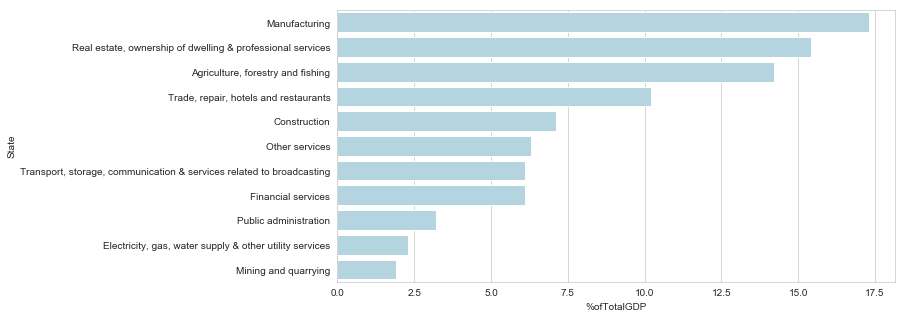

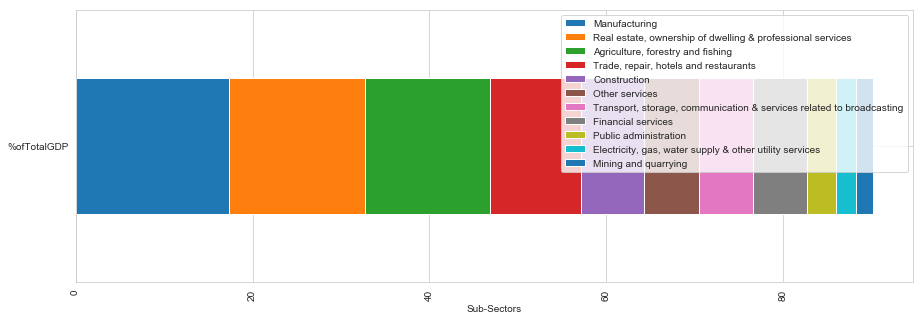

In [150]:
plot_categories(t_c2," C2")

<h4>Subcategories contributing 80% of GDP <font color='red'>for C2 having states Andhra_Pradesh , Arunachal_Pradesh , Gujarat , Himachal_Pradesh , Karnataka , Maharashtra , Punjab , Tamil_Nadu , Telangana</font></h4>
<ol>
    <li>Manufacturing</li>
    <li>Real estate, ownership of dwelling & professional services	</li>
    <li>Agriculture, forestry and fishing</li>
    <li>Trade, repair, hotels and restaurants	</li>
    <li>Construction</li>
    <li>Other Services</li>
    <li>Transport, storage, communication & services related to broadcasting	</li>
</ol>

Plot for category C3 having states Chhattisgarh , Jammu_Kashmir , Meghalaya , Mizoram , Nagaland , Odisha , Rajasthan , Tripura


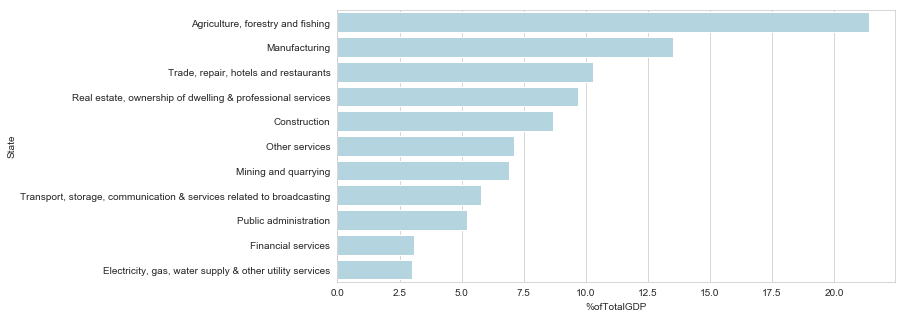

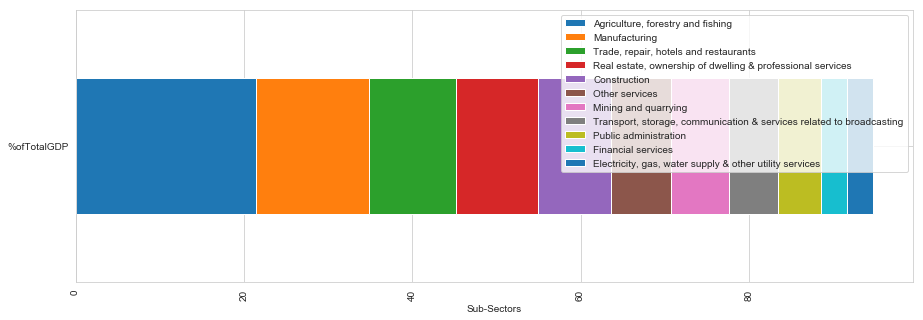

In [151]:
plot_categories(t_c3," C3")

<h4>Subcategories contributing 80% of GDP <font color='red'>for C3 having states Chhattisgarh , Jammu_Kashmir , Meghalaya , Mizoram , Nagaland , Odisha , Rajasthan , Tripura</font></h4>
<ol>
    <li>Agriculture, forestry and fishing</li>
    <li>Manufacturing</li>
    <li>Trade, repair, hotels and restaurants	</li>
    <li>Real estate, ownership of dwelling & professional services	</li>
    <li>Construction</li>
    <li>Other Services</li>
    <li>Mining and quarrying</li>
</ol>

Plot for category C4 having states Assam , Bihar , Jharkhand , Madhya_Pradesh , Manipur , Uttar_Pradesh


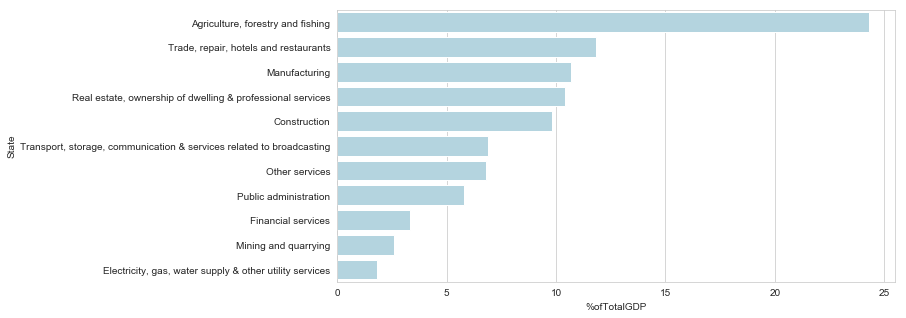

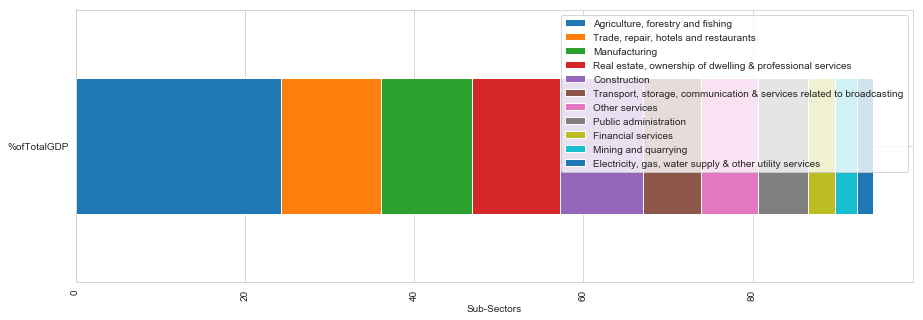

In [152]:
plot_categories(t_c4," C4")

<h4>Subcategories contributing 80% of GDP <font color='red'>for C4 having states Assam , Bihar , Jharkhand , Madhya_Pradesh , Manipur , Uttar_Pradesh</font></h4>
<ol>
    <li>Agriculture, forestry and fishing</li>
    <li>Trade, repair, hotels and restaurants	</li>
    <li>Manufacturing</li>
    <li>Real estate, ownership of dwelling & professional services	</li>
    <li>Construction</li>
    <li>Transport, storage, communication & services related to broadcasting	</li>
    <li>Other Services</li>
</ol>

<h3>How does the GDP distribution of the top states (C1) differ from the others?</h3>
<br>
I terms of sub sectors <b>Trade, repair, hotels and restaurants</b> is the most contributing sub sector in C1 by contributing more than 13%. No doubts C1 states have good tourism and which making it profitable in <b>Trade, repair, hotels and restaurants</b>. Other than this in all categories top 5 subsectors are almost common.


<h3>Which sub-sectors seem to be correlated with high GDP?</h3>
<br>
Agricuture and Manufacturing are most correlated with GDP as these are the most contributing sub-sectors

<h3>Which sub-sectors to focus on? </h3>
<br>
<b>Though there are many sub-sectors are lagging but focus on sub-sectors like utility services can not contribute much as those are govt controlled as those are daily needs, so excet those following can be focus sub-sectors</b>
<ol>
    <li>Mining and Quarrying</li>
    <li>Financial Services</li>
</ol>

<h2>Recommendations for each category to improve the per capita GDP.</h2>
<ol>
    <li>States must focus on tourism, agriculture and manufacturing to boost economy</li>
    <li>Lagging subsectors need long period plans to bring them in main stream</li>
</ol>

<h2 dir="ltr" style="margin-bottom: 0px;"><strong>Part-II: GDP and Education Dropout Rates</strong></h2>
<p dir="ltr" style="margin-bottom: 0px;"><strong>Part-II: GDP and Education</strong></p>
<ul><li dir="ltr"><p dir="ltr">Analyse&nbsp;if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state. Choose an appropriate plot to conduct this analysis.</p></li><li dir="ltr"><p dir="ltr">Write down the key insights you draw from this data:</p><ul><li><p dir="ltr">Form at least one reasonable hypothesis for the observations from the data.</p></li></ul></li></ul>

In [37]:
dropout_rate_data=pd.read_csv("./GDP-Assignment/Statewise-annual-dropout-o.csv")

In [38]:
dropout_rate_data.columns

Index(['Sl. No.', 'Level of Education - State', 'Primary - 2012-2013',
       'Primary - 2014-2015', 'Primary - 2014-2015.1',
       'Upper Primary - 2012-2013', 'Upper Primary - 2013-2014',
       'Upper Primary - 2014-2015', 'Secondary - 2012-2013',
       'Secondary - 2013-2014', 'Secondary - 2014-2015',
       'Senior Secondary - 2012-2013', 'Senior Secondary - 2013-2014',
       'Senior Secondary - 2014-2015'],
      dtype='object')

<h5 style="color:red">Alert!</h5>
<p>Here we have 2 columns for <strong style="color:red">Primary - 2014-2015</strong> => 'Primary - 2014-2015' & 'Primary - 2014-2015.1'. Its clear mistake in data set 1st should be 'Primary - 2013-2014' and second should be 'Primary - 2014-2015', so here using  <strong style="color:red">2nd one</strong></p> 

In [39]:
dropout_rate_data_2014_15=dropout_rate_data[['Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015']]
dropout_rate_data_2014_15=dropout_rate_data_2014_15.rename(columns={'Level of Education - State':'State','Primary - 2014-2015.1':'Primary','Upper Primary - 2014-2015':'Upper_Primary','Secondary - 2014-2015':'Secondary'})

In [40]:
dropout_rate_data_UT=["A & N Islands","Chandigarh","Dadra & Nagar Haveli","Daman & Diu","Delhi","Lakshadweep","Puducherry"]
dropout_rate_data_2014_15=dropout_rate_data_2014_15[~(dropout_rate_data_2014_15['State'].isin(dropout_rate_data_UT))]
dropout_rate_data_2014_15['State']=dropout_rate_data_2014_15['State'].str.replace(" ","_").str.strip()

# Correct value for Jammu and Kashmir to Jammu_Kashmir
dropout_rate_data_2014_15.loc[dropout_rate_data_2014_15.State == 'Jammu_and_Kashmir', 'State']='Jammu_Kashmir'
# dropout_rate_data_2014_15.at[14,'State']="Jammu_Kashmir"

# Correct spellings according to part1 data
dropout_rate_data_2014_15.loc[dropout_rate_data_2014_15.State == 'Chhatisgarh', 'State']='Chhattisgarh'
dropout_rate_data_2014_15.loc[dropout_rate_data_2014_15.State == 'Uttrakhand', 'State']='Uttarakhand'

In [41]:
#Remove row for All_India values 
dropout_rate_data_2014_15=dropout_rate_data_2014_15.drop((dropout_rate_data_2014_15.loc[dropout_rate_data_2014_15.State == 'All_India', :]).index,axis=0)
# dropout_rate_data_2014_15

In [42]:
#Reindex the result
dropout_rate_data_2014_15.index = range(len(dropout_rate_data_2014_15))

In [43]:
dropout_rate_data_2014_15[:-1].describe()

,Primary,Upper_Primary,Secondary
count,25.000000,26.000000,28.000000
mean,5.193200,4.540385,17.788571
std,3.823503,2.731613,6.718144
min,0.640000,0.070000,6.070000
25%,2.080000,2.400000,12.732500
50%,5.020000,4.140000,16.500000
75%,6.790000,6.270000,24.192500
max,15.360000,10.510000,29.560000


Initial analysis gives clear picture that in all 35 states excluding UTs, there is more drop out rate for Secondary Education while Upper primary shows less rate than other 2 categories

In [44]:
droupout_vs_GDP_per_capita=pd.merge(GDP_per_capita_data.sort_index().reset_index(level=0).rename(columns={'index': 'State'}),dropout_rate_data_2014_15,on=['State'],how="outer")

In [45]:
droupout_vs_GDP_per_capita=droupout_vs_GDP_per_capita.drop((droupout_vs_GDP_per_capita.loc[droupout_vs_GDP_per_capita.State == 'West_Bengal', :]).index,axis=0)

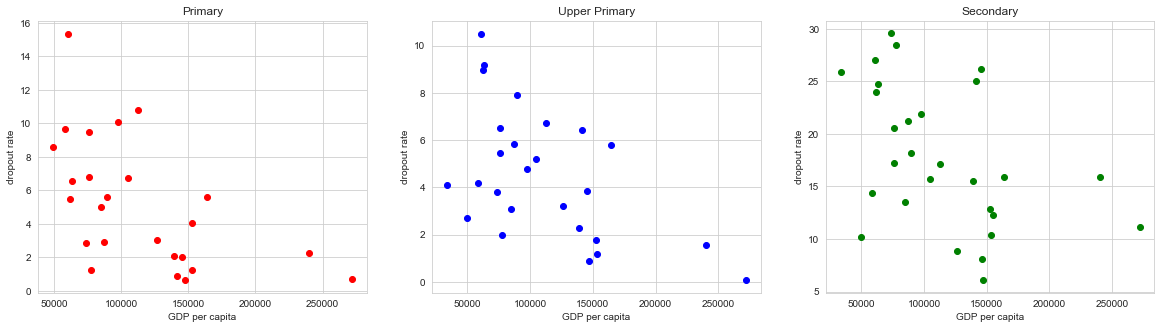

In [46]:
# droupout_vs_GDP_per_capita['Per Capita GSDP (Rs.)']=droupout_vs_GDP_per_capita['Per Capita GSDP (Rs.)'].astype('int64')

GDP_per_capita=droupout_vs_GDP_per_capita['Per Capita GSDP (Rs.)']

plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(GDP_per_capita, droupout_vs_GDP_per_capita['Primary'], color='r')
plt.xlabel('GDP per capita')
plt.ylabel("dropout rate")
plt.title("Primary")
plt.subplot(132)
plt.scatter(GDP_per_capita, droupout_vs_GDP_per_capita['Upper_Primary'], color='b')
plt.xlabel('GDP per capita')
plt.ylabel("dropout rate")
plt.title("Upper Primary")
plt.subplot(133)
plt.scatter(GDP_per_capita, droupout_vs_GDP_per_capita['Secondary'], color='g')
plt.xlabel('GDP per capita')
plt.ylabel("dropout rate")
plt.title("Secondary")
plt.show()

<b> All plots gives general idea that higher the per capita GDP lower the drop out rate</b>

<b>For Primary education the clear correlation showes higher the per capita GDP lower the drop out rate<b>

<b>For Upper Primary education the scatter plot clear correlation showes higher the per capita GDP lower the drop out rate, One major thing to notice is <b>

<b>For Secondary education the scatter plot does not show clear correlation but we can say most states fall over median where per capita GDP is average and the drop out rate high<b>

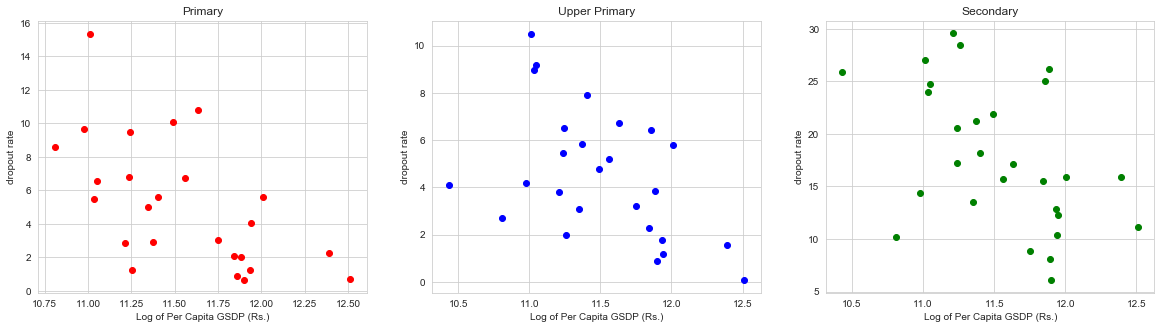

In [47]:
droupout_vs_GDP_per_capita['Per Capita GSDP (Rs.)']=droupout_vs_GDP_per_capita['Per Capita GSDP (Rs.)'].astype('int64')

LOG_GDP_per_capita=np.log(droupout_vs_GDP_per_capita['Per Capita GSDP (Rs.)'])

plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(LOG_GDP_per_capita, droupout_vs_GDP_per_capita['Primary'], color='r')
plt.xlabel('Log of Per Capita GSDP (Rs.)')
plt.ylabel("dropout rate")
plt.title("Primary")
plt.subplot(132)
plt.scatter(LOG_GDP_per_capita, droupout_vs_GDP_per_capita['Upper_Primary'], color='b')
plt.xlabel('Log of Per Capita GSDP (Rs.)')
plt.ylabel("dropout rate")
plt.title("Upper Primary")
plt.subplot(133)
plt.scatter(LOG_GDP_per_capita, droupout_vs_GDP_per_capita['Secondary'], color='g')
plt.xlabel('Log of Per Capita GSDP (Rs.)')
plt.ylabel("dropout rate")
plt.title("Secondary")
plt.show()

In [156]:

def plot_droupout_vs_GDP_per_capita_vs_states(edu_level):
    # Create a dataset:
    data=droupout_vs_GDP_per_capita[['State','Per Capita GSDP (Rs.)',edu_level]];
    data=data.dropna()
    
    drop_out_rate=data[edu_level]
    sizes=data['Per Capita GSDP (Rs.)']
    states=data.State 
    labels=["%s\n%d\n%d" % (label) for label in zip(states, sizes, drop_out_rate)]
    # create a color palette, mapped to these values
    cmap = matplotlib.cm.Blues
    mini=min(drop_out_rate)
    maxi=max(drop_out_rate)
    norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
    colors = [cmap(norm(value)) for value in drop_out_rate]
    fig=plt.figure(figsize=(15,15))

    # plot
    squarify.plot(sizes=sizes, alpha=1, color=colors,label= labels)
    
    # Color bar  
    img = plt.imshow([data[edu_level]], cmap=cmap)
    img.set_visible(False)
    fig.colorbar(img, orientation="vertical", shrink=.81)
    fig.text(.75, .82, "Dropout Rate", fontsize=14)

    plt.axis('off')
    plt.title("Drop out vs GDP er capita over States for "+edu_level+" Education")
    plt.show()

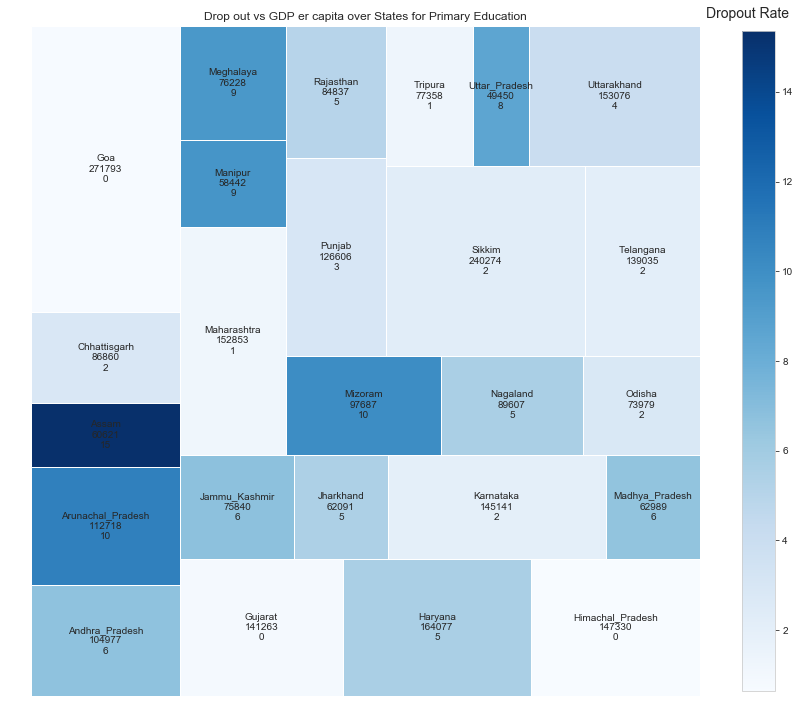

In [157]:
plot_droupout_vs_GDP_per_capita_vs_states('Primary')

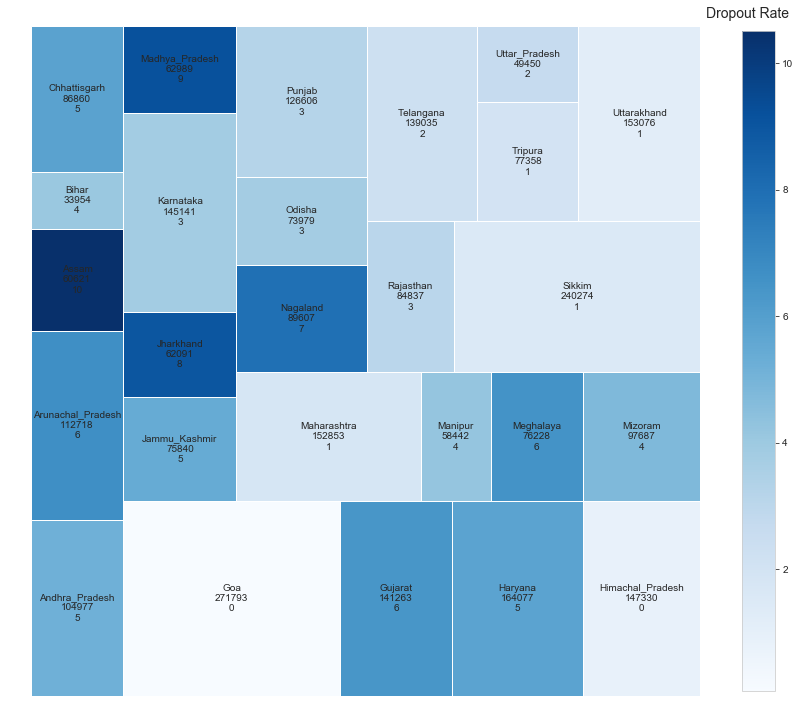

In [112]:
plot_droupout_vs_GDP_per_capita_vs_states('Upper_Primary')

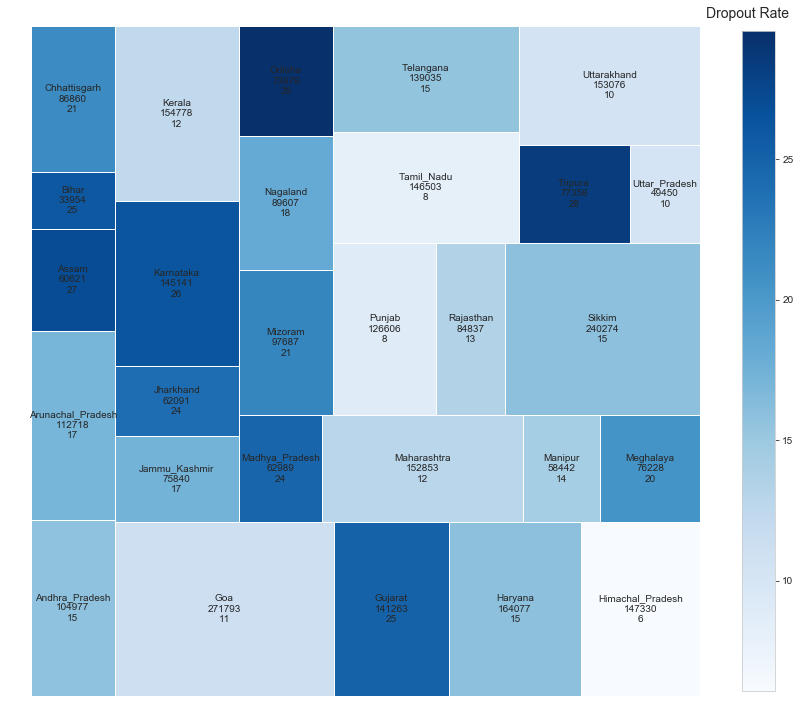

In [113]:
plot_droupout_vs_GDP_per_capita_vs_states('Secondary')